<a href="https://colab.research.google.com/github/CosmicGem20/Handwritting_Recognition/blob/main/Handwritten_Digits_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

# Loading - "MNIST DATASET"

Containing Training Samples = 60000, testing Samples = 10000

**Tensorflow already contains MNIST data set which can be loaded using Keras**

In [2]:
mnist = tf.keras.datasets.mnist

# After Loading the MNIST dat, Dividing it into Train and Test Datasets

In [3]:
#unpacking the dataset into train and test datasets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
X_test.shape

(10000, 28, 28)

In [6]:
import matplotlib.pyplot as plt


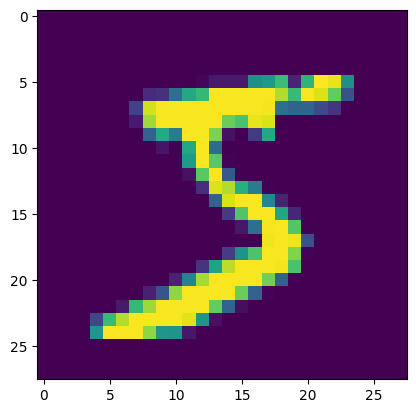

In [7]:
plt.imshow(X_train[0])
plt.show()

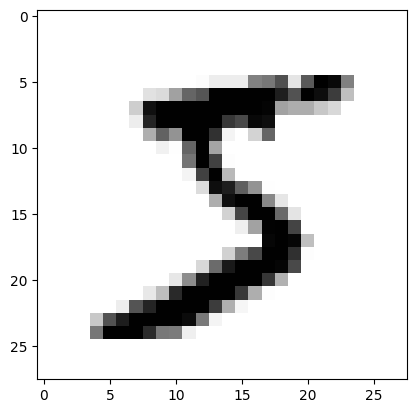

In [8]:
plt.imshow(X_train[0] , cmap= plt.cm.binary)

# Checking the values of each pixels

**Before Normalisation**

In [9]:
print(X_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

# Normalising The Data | Pre-Processing Step

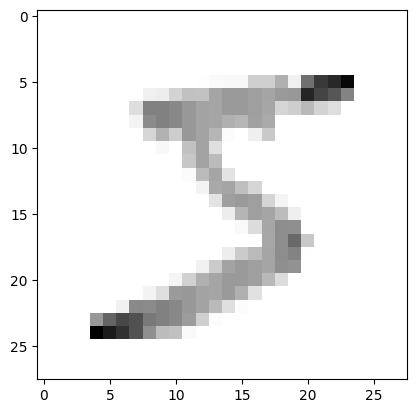

In [10]:
X_train = tf.keras.utils.normalize(X_train , axis = 1)
X_test = tf.keras.utils.normalize(X_test , axis = 1)
plt.imshow(X_train[0] , cmap= plt.cm.binary)

**After Normalising**

In [11]:
print(X_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [12]:
print(y_train[0])

5


Resizing image to make it suitable for apply Convolution Operation

In [13]:
 import numpy as np
 IMG_SIZE = 28
 X_trainr = np.array(X_train).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
 X_testr = np.array(X_test).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
 print("Training Samples Dimensions", X_trainr.shape)
 print("Testing Samples Dimensions", X_testr.shape)


Training Samples Dimensions (60000, 28, 28, 1)
Testing Samples Dimensions (10000, 28, 28, 1)


# Creating a Deep Learning Neural Network

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D


**Creating a neural Network**

In [15]:
model = Sequential()


model.add(Conv2D(64, (3,3), input_shape = X_trainr.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation("relu"))

model.add(Dense(32))
model.add(Activation("relu"))

model.add(Dense(10))
model.add(Activation('softmax'))

model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=['accuracy'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 26, 26, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 11, 11, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 3, 3, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 1, 1, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             330 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_5 (Activation)            │ (None, 10)                  │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 81,066 (316.66 KB)

 Trainable params: 81,066 (316.66 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
print("Total Training Samples = ", len(X_trainr))
print("Total Testing Samples = ", len(X_testr))

Total Training Samples =  60000
Total Testing Samples =  10000


In [18]:
model.compile(loss = "sparse_categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])

In [19]:
model.fit(X_trainr, y_train, epochs = 5, validation_split = 0.3)

Epoch 1/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 71s 52ms/step - accuracy: 0.7647 - loss: 0.7325 - val_accuracy: 0.9602 - val_loss: 0.1236
Epoch 2/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 80s 51ms/step - accuracy: 0.9627 - loss: 0.1193 - val_accuracy: 0.9680 - val_loss: 0.1044
Epoch 3/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 82s 51ms/step - accuracy: 0.9763 - loss: 0.0783 - val_accuracy: 0.9689 - val_loss: 0.1040
Epoch 4/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 82s 51ms/step - accuracy: 0.9805 - loss: 0.0621 - val_accuracy: 0.9781 - val_loss: 0.0713
Epoch 5/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 86s 54ms/step - accuracy: 0.9847 - loss: 0.0505 - val_accuracy: 0.9813 - val_loss: 0.0625


In [20]:
#validation accuracy 30 < accuracy 98 ## Overfitting --> solution: Drop out layer


In [21]:
#Evaluating on testing data set MNIST
test_lost , test_acc = model.evaluate(X_testr, y_test)
print("Test Accuracy = ", test_acc)
print("Test Loss = ", test_lost)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.9780 - loss: 0.0709
Test Accuracy =  0.9821000099182129
Test Loss =  0.05991481989622116


In [22]:
predictions = model.predict([X_testr])

  5/313 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step  

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor
Received: inputs=('Tensor(shape=(32, 28, 28, 1))',)
  warnings.warn(msg)


313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor
Received: inputs=('Tensor(shape=(None, 28, 28, 1))',)
  warnings.warn(msg)


In [23]:
print(predictions)

[[2.88158759e-07 9.72806635e-09 2.12997548e-07 ... 9.99995291e-01
  5.56527979e-09 2.98102418e-06]
 [1.99171642e-04 1.18294534e-04 9.99574363e-01 ... 6.59305442e-05
  2.79288397e-05 1.06168592e-07]
 [4.10544239e-08 9.99998391e-01 8.42215044e-08 ... 4.17965111e-07
  1.93595486e-08 3.05086516e-08]
 ...
 [5.73217518e-09 1.25211609e-05 2.73608691e-08 ... 1.58484994e-07
  3.54362273e-05 6.96359784e-05]
 [3.58606769e-07 5.84855862e-08 7.39552375e-09 ... 8.61004708e-07
  1.34803762e-04 1.45066315e-06]
 [1.63165587e-05 7.69210828e-08 3.79012022e-06 ... 5.88935434e-09
  1.27506246e-05 1.40356548e-07]]


In [24]:
print(np.argmax(predictions[0]))

7


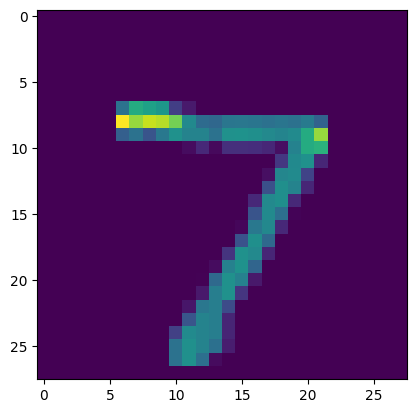

In [25]:
plt.imshow(X_test[0])

In [26]:
print(np.argmax(predictions[128]))

8


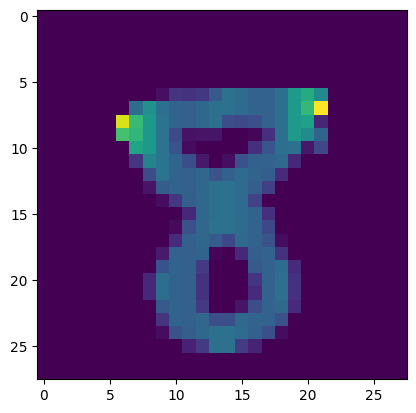

In [27]:
plt.imshow(X_test[128])

In [28]:
import cv2

In [29]:
img = cv2.imread("/content/img7.png")

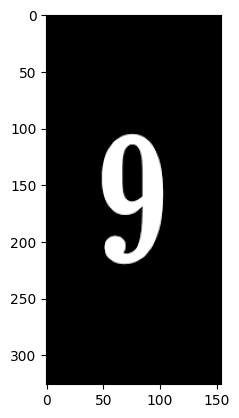

In [30]:
plt.imshow(img)

In [31]:
img.shape

(326, 154, 3)

In [32]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [33]:
gray.shape

(326, 154)

In [34]:
resize = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)

In [35]:
resize.shape

(28, 28)

In [36]:
newimg = tf.keras.utils.normalize(resize, axis = 1)

In [37]:
newimg = np.array(newimg).reshape(-1, IMG_SIZE, IMG_SIZE , 1)

In [38]:
newimg.shape

(1, 28, 28, 1)

In [39]:
predictions = model.predict(newimg)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


In [40]:
print(np.argmax(predictions))

9
